## Yapay Sinir Ağları uygulaması

In [11]:
import numpy as np
def activation(z, kind):

    implemented = ('linear', 'unit step', 'logistic', 'piecewise linear', 'tanh')
    
    if kind not in implemented:
        raise AttributeError('%s not in %s' % (kind, implemented))

    if kind == 'unit step':
        return np.where(z >= 0.0, 1, 0) #np.where-->> z >= 0.0 condition sağlanırsa 1, sağlanmazsa 0 döndürür. 

    elif kind == 'logistic':
        return  1.0 / (1.0 + np.exp(-z))  #np.exp() -->> Euler sayısı sabiti 2.718281828459045 sayısıdır. Bu fonksiyon taban olarak aldığı bu sayının x kadar üssünü döndürür.

    elif kind == 'tanh':
        e_p = np.exp(z)
        e_m = np.exp(-z)
        return (e_p - e_m) / (e_p + e_m)

    elif kind == 'piecewise linear':
        if z >= 0.5:
            return 1
        elif z <= -0.5:
            return 0
        else:
            return z + 0.5

    else:
        return z

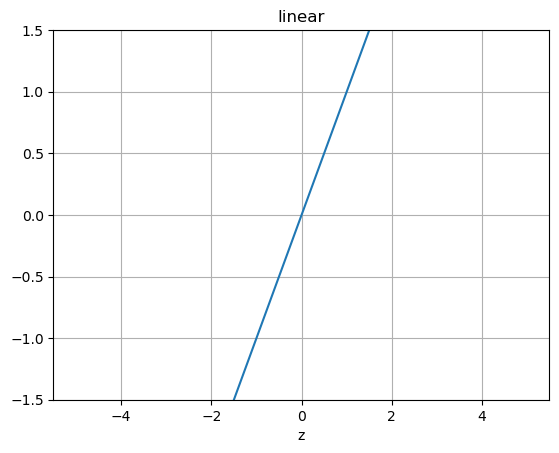

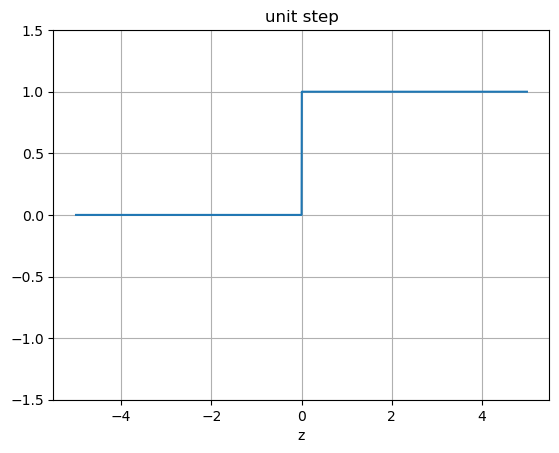

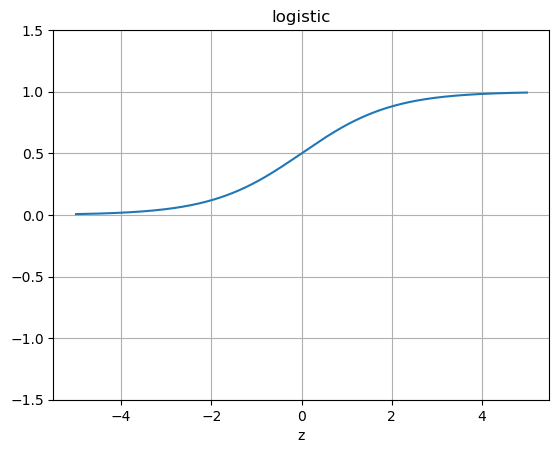

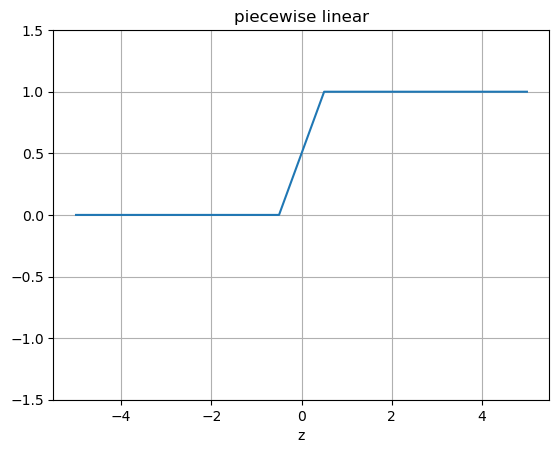

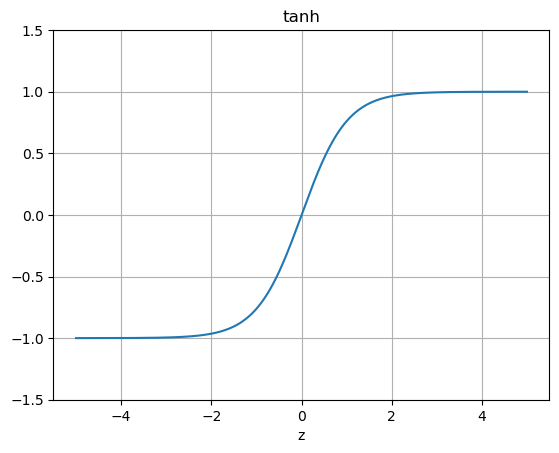

In [17]:
import matplotlib.pyplot as plt
x = np.arange(-5, 5, 0.005) #z için x ekseninde değer  aralığı belirledik
for a in ('linear', 'unit step', 'logistic', 'piecewise linear', 'tanh'):
    y = [activation(z, kind = a) for z in x]
    plt.plot(x, y)
    plt.title(a)
    plt.ylim([-1.5, 1.5])  #y ekseni değer aralığı
    plt.xlabel('z')
    plt.grid()
    plt.show()

## İleri Yayılım Algoritması

In [48]:
girdi_1 = np.array([4, 5])
agirlik_1 = {'dugum_1': np.array([2, -1]),
             'dugum_2': np.array([1, 1])}

girdi_21 = (girdi_1 * agirlik_1['dugum_1']).sum()
girdi_22 = (girdi_1 * agirlik_1['dugum_2']).sum()

cikti_21 = activation(-girdi_21, kind = 'logistic')
cikti_22 = activation(-girdi_22, kind = 'logistic')

girdi_2 = np.array([cikti_21, cikti_22])

agirlik_2 = np.array([2, 1])

girdi_3 = (girdi_2 * agirlik_2).sum()
cikti_3 = activation(-girdi_3, kind = 'logistic')
cikti_3


0.4762740466433129

array([ 0.44445523,  2.37778209, -0.24443582])

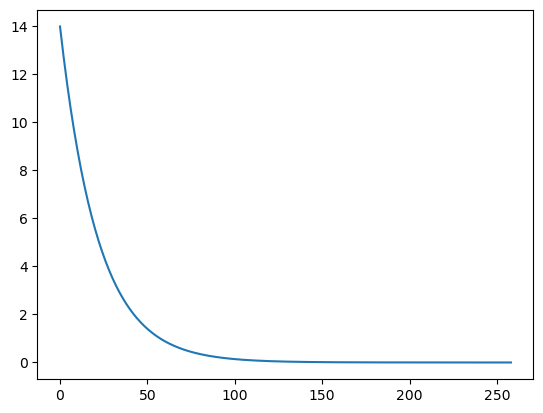

In [50]:
eps = 0.0001
kayip = []
deger = 6
girdi = np.array([5, 2, 4])
ogrenme_orani = 0.001
w = np.array([2, 3, 1])
hata = (w*girdi).sum() -deger
kayip.append(hata)
while hata > eps:
    egim = girdi*((w*girdi).sum() - deger)
    w = w-ogrenme_orani*egim
    hata =(w*girdi).sum() - deger
    kayip.append(hata)
plt.plot(kayip)
w

In [52]:
girdi = np.array([4.79, 1.99, 3.98])
(girdi*w).sum()

5.887872348126008

In [92]:
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"


In [58]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
irisdata = pd.read_csv(url, names=names)

In [60]:
X = irisdata.iloc[:, 0:4]
#takes first 5th columns and assign them to variable "Y". Object dtype refers to strings.
y = irisdata.select_dtypes(include= [object])
X.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [62]:
y.head()

,Class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [64]:
y.Class.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [68]:
le = preprocessing.LabelEncoder()
y = y.apply(le.fit_transform)
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


In [72]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
mlp = MLPClassifier(hidden_layer_sizes = (20, 20, 20), max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())

#.values.ravel(): y_train veri seti bir pandas Series ise, .values metodu, Series'i bir NumPy array'e dönüştürür.
#ravel() metodu ise, bu array'i düzleştirir (tek boyutlu hale getirir).
#MLPClassifier genellikle etiketlerin tek boyutlu bir array şeklinde olmasını bekler, 
#bu yüzden ravel() kullanılarak gerekli format sağlanır.

from sklearn import set_config
set_config(print_changed_only=False)
mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [82]:
predictions = mlp.predict(X_test)
predictions

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



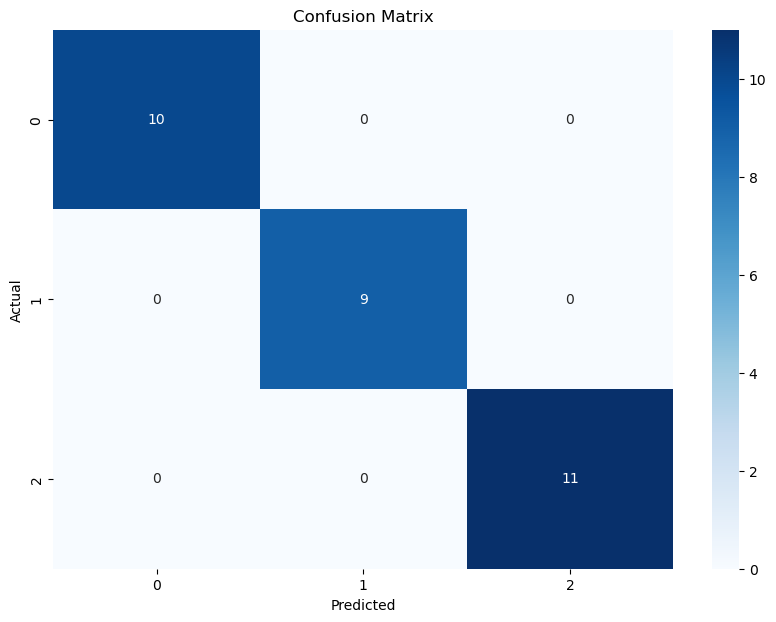

In [98]:
import seaborn as sns

#evaluation of algorithm performance in classifying flowers
cm = confusion_matrix(y_test, predictions)
print(cm)
print(classification_report(y_test, predictions))

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

#set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()